# Métricas de clasificación

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-02-19

**Fecha de actualización:** 2022-02-19

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay

from sklearn.model_selection import train_test_split 

In [2]:
filename = 'data/bank_modified.csv'
data = pd.read_csv(filename)
data.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [3]:
print('Clases:', np.unique(data['y_yes']))

Clases: [0 1]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

<AxesSubplot:>

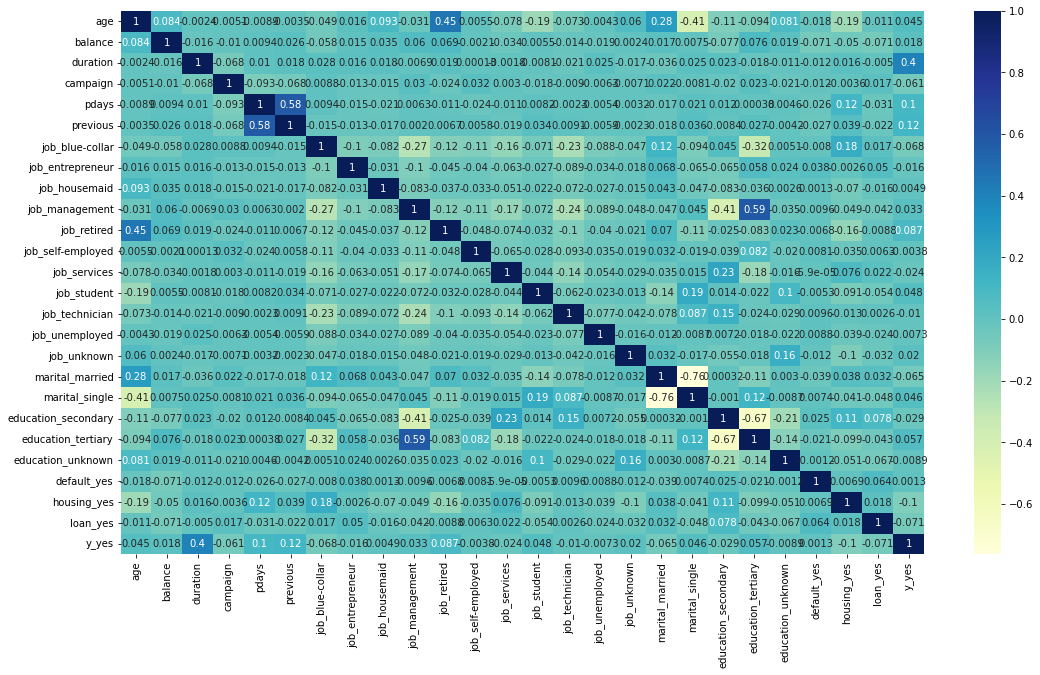

In [5]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [6]:
# En el primer intento se utilizaron todas las variables
X = data.drop(columns='y_yes')

# Se toman únicamente a las seis varibles con mayor correlación lineal
X = data.loc[:,['duration','pdays','previous','job_retired','job_blue-collar','housing_yes']]
y = data.iloc[:, -1].values

In [7]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(3616, 6)
(905, 6)


In [9]:
logReg = LogisticRegression(penalty='l2',C=0.5,solver='liblinear')
logReg.fit(X_train, y_train)

resultsTest = pd.DataFrame(y_test, columns=['expected'])
resultsTrain = pd.DataFrame(y_train, columns=['expected'])

resultsTest['predicted_l1_c1'] = logReg.predict(X_test)
resultsTrain['predicted_l1_c1'] = logReg.predict(X_train)


## Utilizando regresión logística

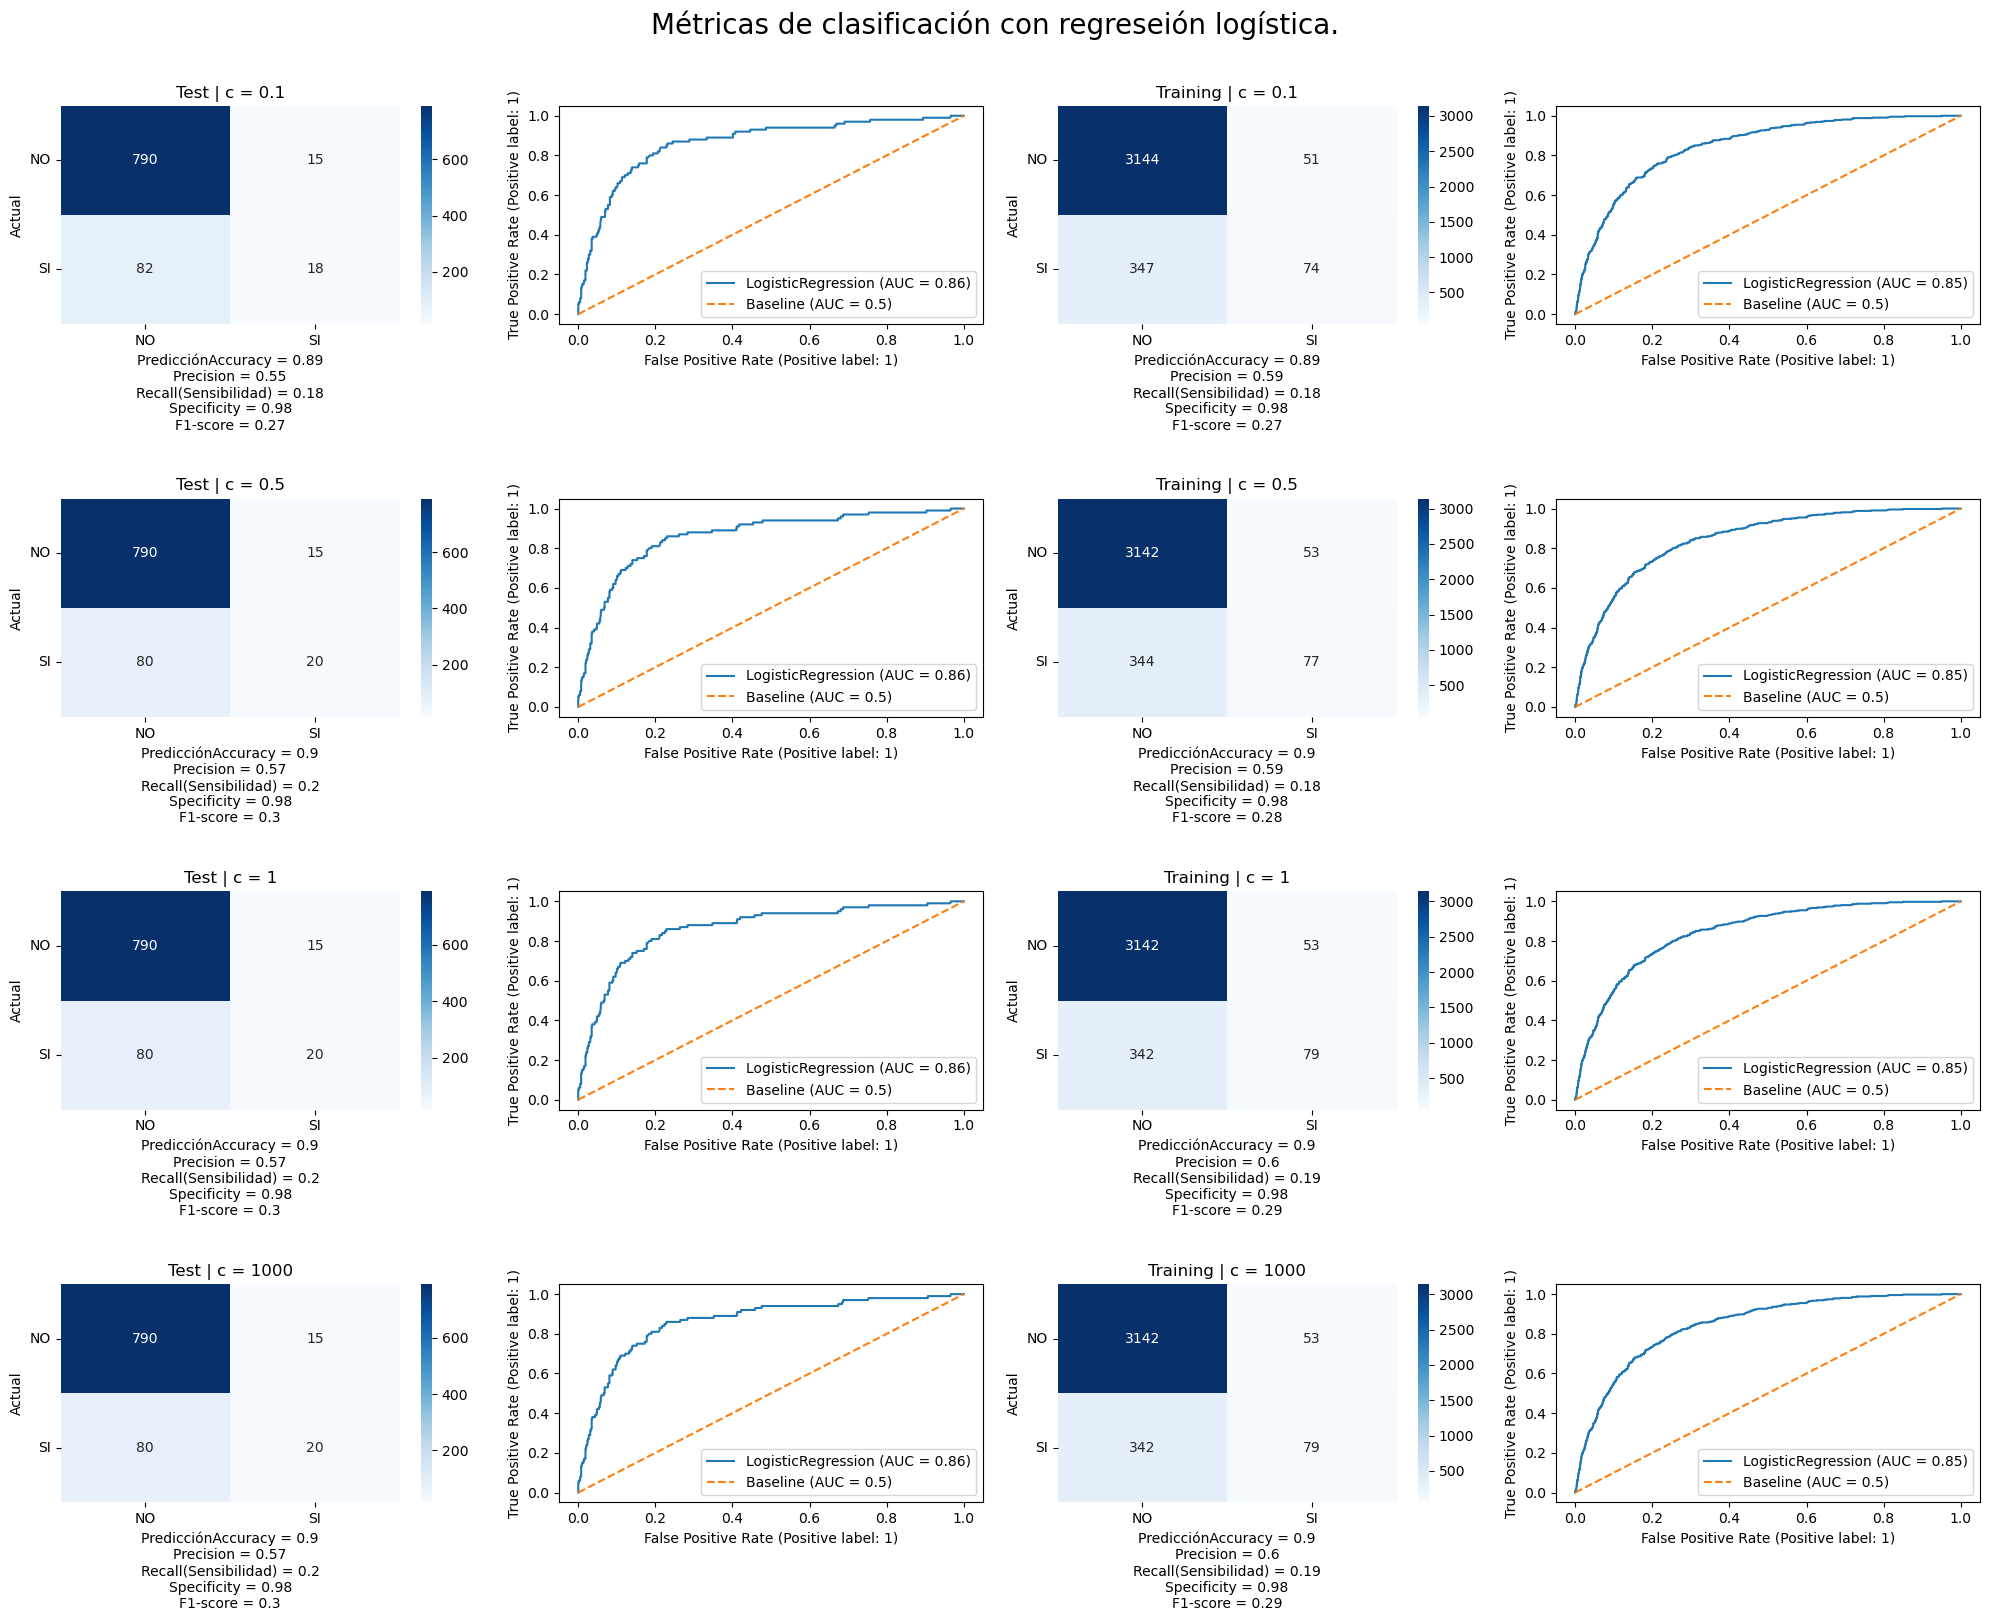

In [10]:
def logRefMetrics(c, row, axes):
    logReg = LogisticRegression(penalty='l2',C=c,solver='liblinear')
    logReg.fit(X_train, y_train)

    resultsTest = pd.DataFrame(y_test, columns=['expected'])
    resultsTrain = pd.DataFrame(y_train, columns=['expected'])

    resultsTest['predicted_l1_c1'] = logReg.predict(X_test)
    resultsTrain['predicted_l1_c1'] = logReg.predict(X_train)


    confTest = confusion_matrix(resultsTest['expected'], resultsTest['predicted_l1_c1'])
    confTraining = confusion_matrix(resultsTrain['expected'], resultsTrain['predicted_l1_c1'])

    hmap = sns.heatmap(ax=axes[row,0],data=confTest,cmap='Blues',annot=True,fmt='g')
    hmap.set_xticklabels(['NO','SI'],rotation = 0)
    hmap.set_yticklabels(['NO','SI'],rotation = 0)
    hmap.set_ylabel('Actual')

    hmap.set_title('Test | c = '+str(c))

    # Obtención de métricas de regresión manualmente, a partir de la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(resultsTest['expected'],resultsTest['predicted_l1_c1']).ravel()
    acurracy = (tp + tn) / (tp + tn  + fp + fn)
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    recall = tp / (tp+fn)
    f1 = 2*(precision*recall)/(precision + recall)
    #aucScore = roc_auc_score(y_test, logReg.predict_proba(X_test)[:,1])

    metricsText = 'Predicción'
    metricsText += 'Accuracy = ' + str(round(acurracy,2))
    metricsText += '\nPrecision = ' + str(round(precision,2))
    metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
    metricsText += '\nSpecificity = ' + str(round(specificity,2))
    metricsText += '\nF1-score = ' + str(round(f1,2))
    #metricsText += '\nAUC = ' + str(round(aucScore,2))
    hmap.set_xlabel(metricsText)

    RocCurveDisplay.from_estimator(logReg, X_test,y_test,ax=axes[row,1])
    axes[row,1].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
    axes[row,1].legend()


    hmap = sns.heatmap(ax=axes[row,2],data=confTraining,cmap='Blues',annot=True,fmt='g')
    hmap.set_xticklabels(['NO','SI'],rotation = 0)
    hmap.set_yticklabels(['NO','SI'],rotation = 0)
    hmap.set_title('Training | c = ' + str(c))
    hmap.set_ylabel('Actual')

    # Obtención de métricas de regresión manualmente, a partir de la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(resultsTrain['expected'],resultsTrain['predicted_l1_c1']).ravel()
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    recall = tp / (tp+fn)
    f1 = 2*(precision*recall)/(precision + recall)
    #aucScore = roc_auc_score(y_train, logReg.predict_proba(X_train)[:,1])

    metricsText = 'Predicción'
    metricsText += 'Accuracy = ' + str(round(acurracy,2))
    metricsText += '\nPrecision = ' + str(round(precision,2))
    metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
    metricsText += '\nSpecificity = ' + str(round(specificity,2))
    metricsText += '\nF1-score = ' + str(round(f1,2))
    #metricsText += '\nAUC = ' + str(round(aucScore,2))
    hmap.set_xlabel(metricsText)

    RocCurveDisplay.from_estimator(logReg, X_train, y_train,ax=axes[row,3])
    axes[row,3].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
    axes[row,3].legend()

plt.style.use('default')
fig,axes = plt.subplots(4,4,figsize=(20,16))

logRefMetrics(c=0.1, row=0, axes=axes)
logRefMetrics(c=0.5, row=1, axes=axes)
logRefMetrics(c=1, row=2, axes=axes)
logRefMetrics(c=1000, row=3, axes=axes)

fig.suptitle("Métricas de clasificación con regreseión logística.",y=1.01, fontsize=20)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8)





## Utilizando Random Forest

C:\ProgramData\Anaconda3\envs\env37\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
C:\ProgramData\Anaconda3\envs\env37\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


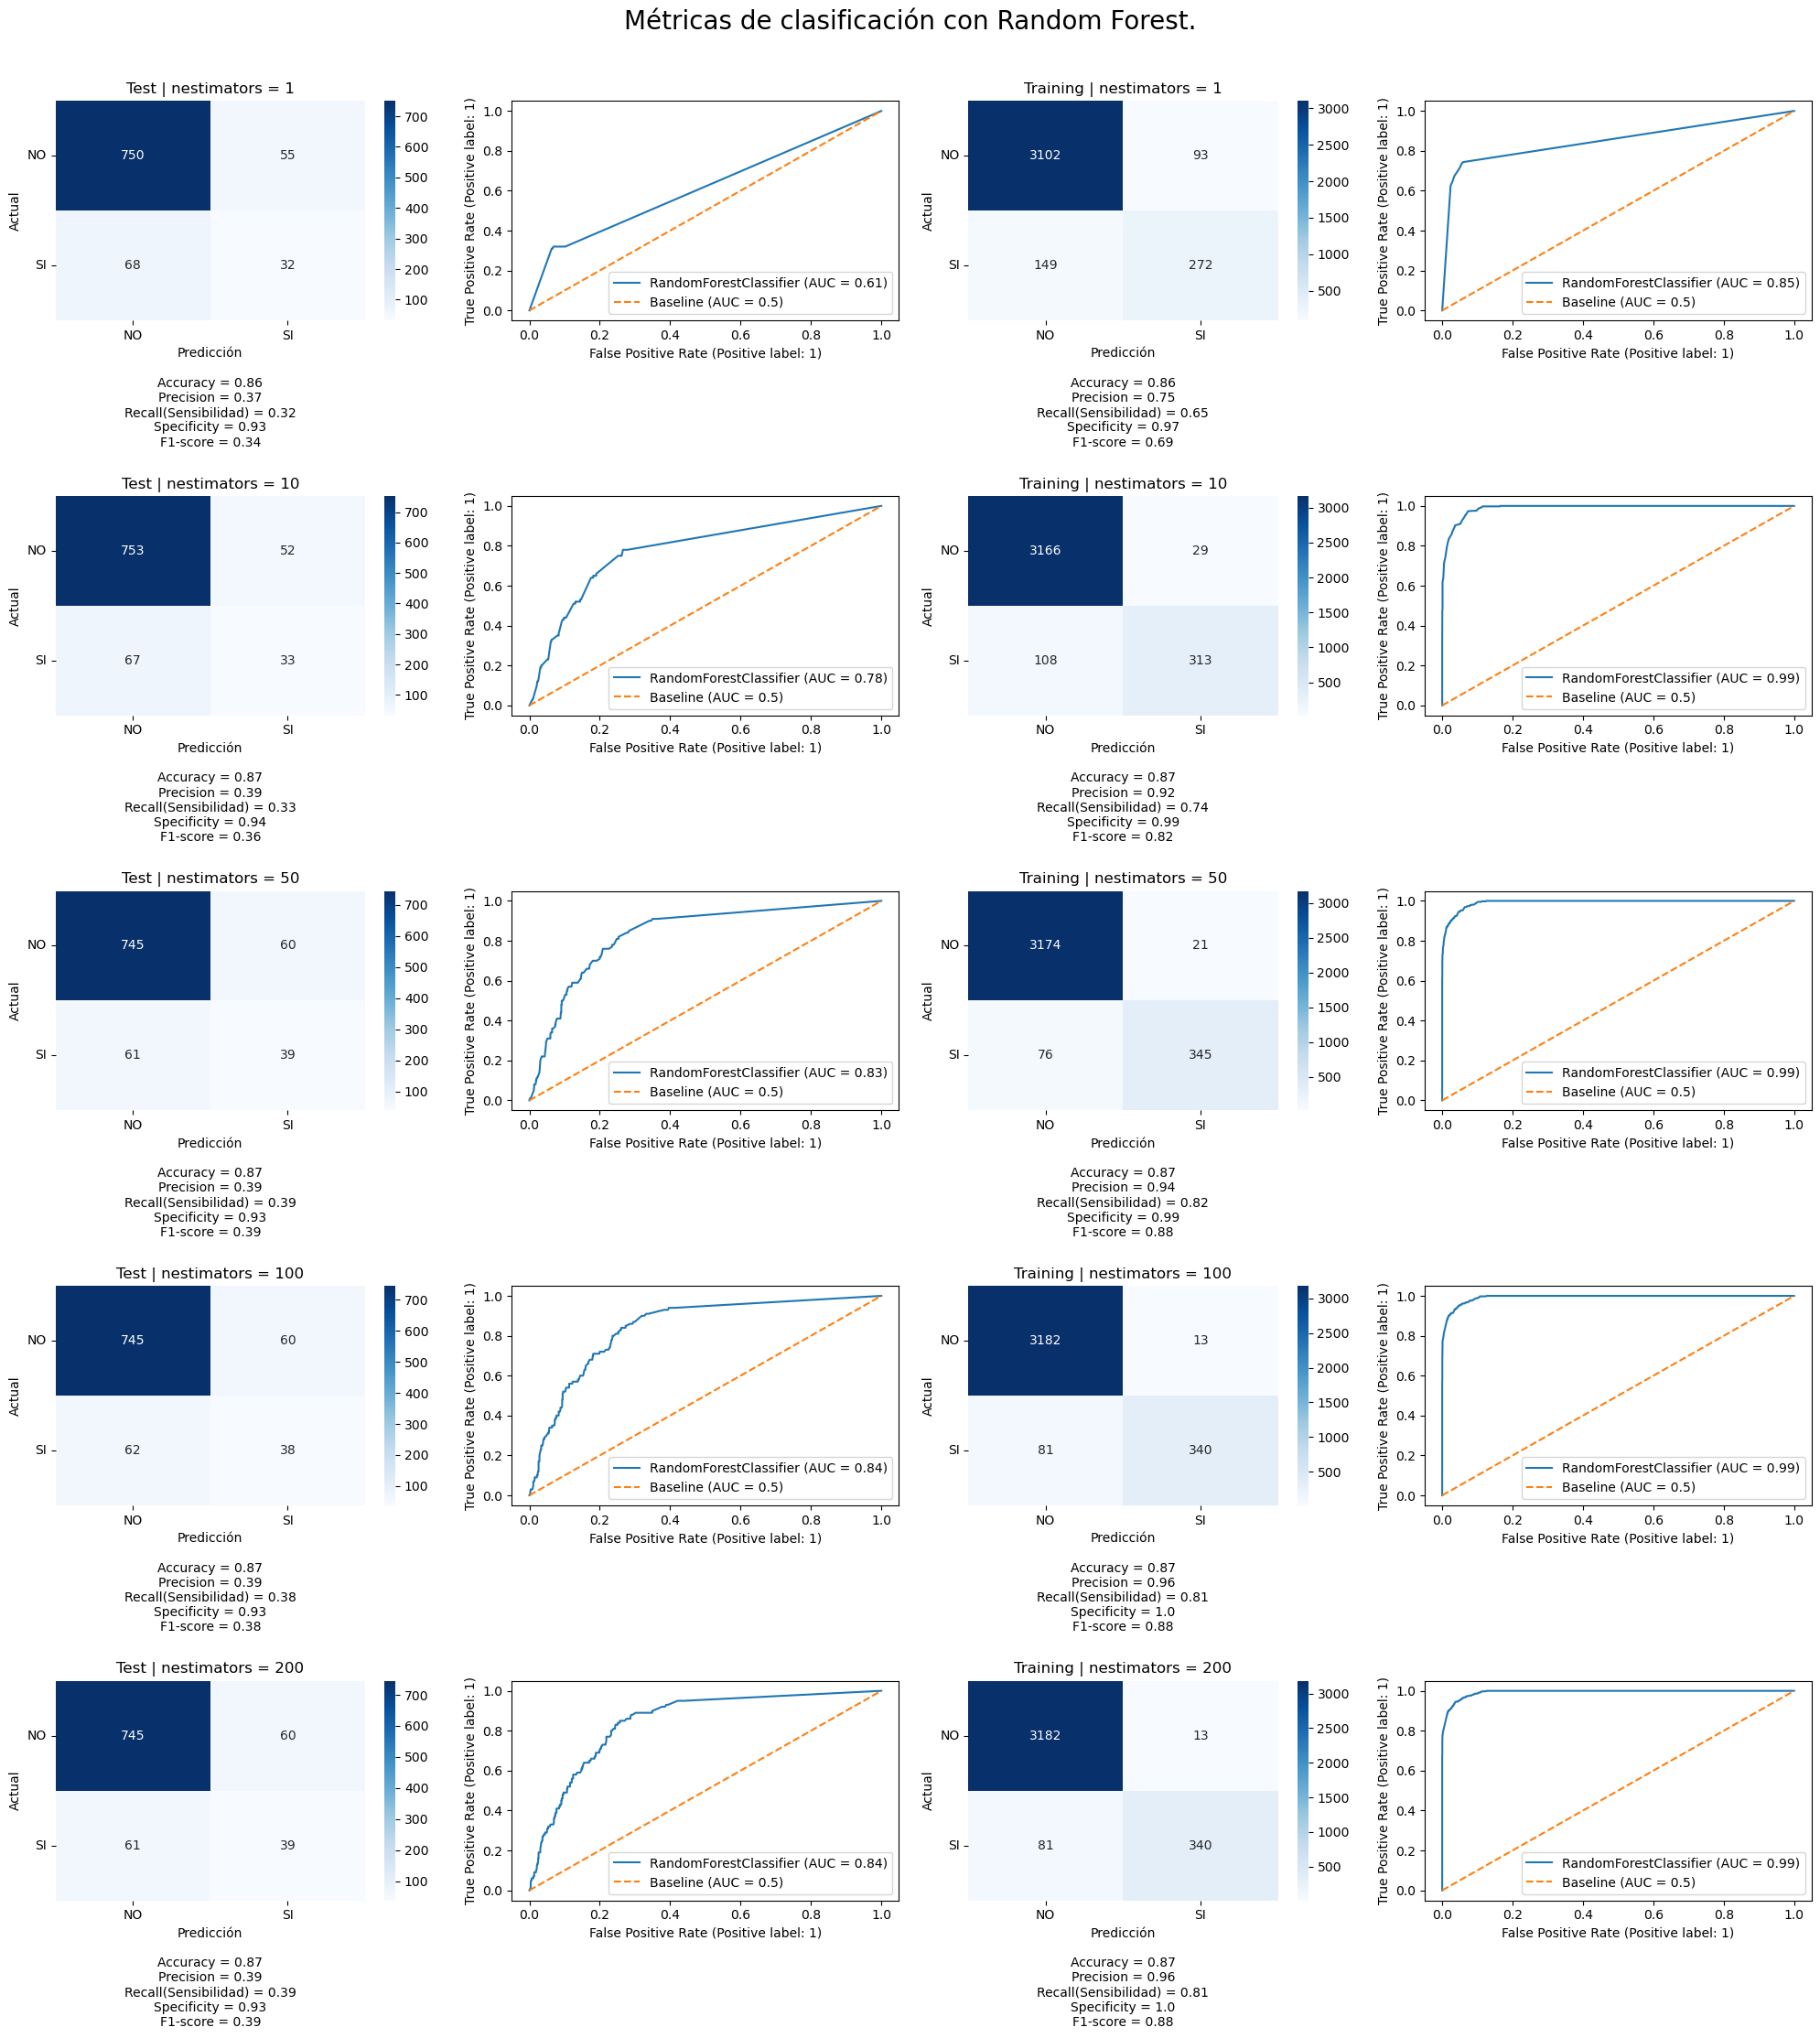

In [11]:
def rfClfMetrics(nEstimators,row,axes):
    rfClf = RandomForestClassifier(bootstrap=True, max_depth=30,
                max_features='auto', n_estimators=nEstimators, n_jobs=100,
                oob_score=True, random_state=3)
    rfClf.fit(X_train, y_train)

    resultsTest = pd.DataFrame(y_test, columns=['expected'])
    resultsTrain = pd.DataFrame(y_train, columns=['expected'])

    resultsTest['predicted_l1_c1'] = rfClf.predict(X_test)
    resultsTrain['predicted_l1_c1'] = rfClf.predict(X_train)


    confTest = confusion_matrix(resultsTest['expected'], resultsTest['predicted_l1_c1'])
    confTraining = confusion_matrix(resultsTrain['expected'], resultsTrain['predicted_l1_c1'])

    hmap = sns.heatmap(ax=axes[row,0],data=confTest,cmap='Blues',annot=True,fmt='g')
    hmap.set_xticklabels(['NO','SI'],rotation = 0)
    hmap.set_yticklabels(['NO','SI'],rotation = 0)
    hmap.set_title('Test | nestimators = ' +str(nEstimators))
    hmap.set_ylabel('Actual')


    tn, fp, fn, tp = confusion_matrix(resultsTest['expected'],resultsTest['predicted_l1_c1']).ravel()
    acurracy = (tp + tn) / (tp + tn  + fp + fn)
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    recall = tp / (tp+fn)
    f1 = 2*(precision*recall)/(precision + recall)
    #aucScore = roc_auc_score(y_test, logReg.predict_proba(X_test)[:,1])

    metricsText = 'Predicción'
    metricsText += '\n\nAccuracy = ' + str(round(acurracy,2))
    metricsText += '\nPrecision = ' + str(round(precision,2))
    metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
    metricsText += '\nSpecificity = ' + str(round(specificity,2))
    metricsText += '\nF1-score = ' + str(round(f1,2))
    #metricsText += '\nAUC = ' + str(round(aucScore,2))
    hmap.set_xlabel(metricsText)

    RocCurveDisplay.from_estimator(rfClf, X_test, y_test,ax=axes[row,1])
    axes[row,1].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
    axes[row,1].legend()

    hmap = sns.heatmap(ax=axes[row,2],data=confTraining,cmap='Blues',annot=True,fmt='g')
    hmap.set_xticklabels(['NO','SI'],rotation = 0)
    hmap.set_yticklabels(['NO','SI'],rotation = 0)
    hmap.set_title('Training | nestimators = ' +str(nEstimators))
    hmap.set_ylabel('Actual')

    tn, fp, fn, tp = confusion_matrix(resultsTrain['expected'],resultsTrain['predicted_l1_c1']).ravel()
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    recall = tp / (tp+fn)
    f1 = 2*(precision*recall)/(precision + recall)
    #aucScore = roc_auc_score(y_train, logReg.predict_proba(X_train)[:,1])

    metricsText = 'Predicción'
    metricsText += '\n\nAccuracy = ' + str(round(acurracy,2))
    metricsText += '\nPrecision = ' + str(round(precision,2))
    metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
    metricsText += '\nSpecificity = ' + str(round(specificity,2))
    metricsText += '\nF1-score = ' + str(round(f1,2))
    #metricsText += '\nAUC = ' + str(round(aucScore,2))
    hmap.set_xlabel(metricsText)

    RocCurveDisplay.from_estimator(rfClf, X_train, y_train,ax=axes[row,3])
    axes[row,3].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
    axes[row,3].legend()

plt.style.use('default')
fig,axes = plt.subplots(5,4,figsize=(20,22))

rfClfMetrics(nEstimators=1, row=0, axes=axes)
rfClfMetrics(nEstimators=10, row=1, axes=axes)
rfClfMetrics(nEstimators=50, row=2, axes=axes)
rfClfMetrics(nEstimators=100, row=3, axes=axes)
rfClfMetrics(nEstimators=200, row=4, axes=axes)

fig.suptitle("Métricas de clasificación con Random Forest.",y=1.01, fontsize=20)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8)


## Utilizando KNN

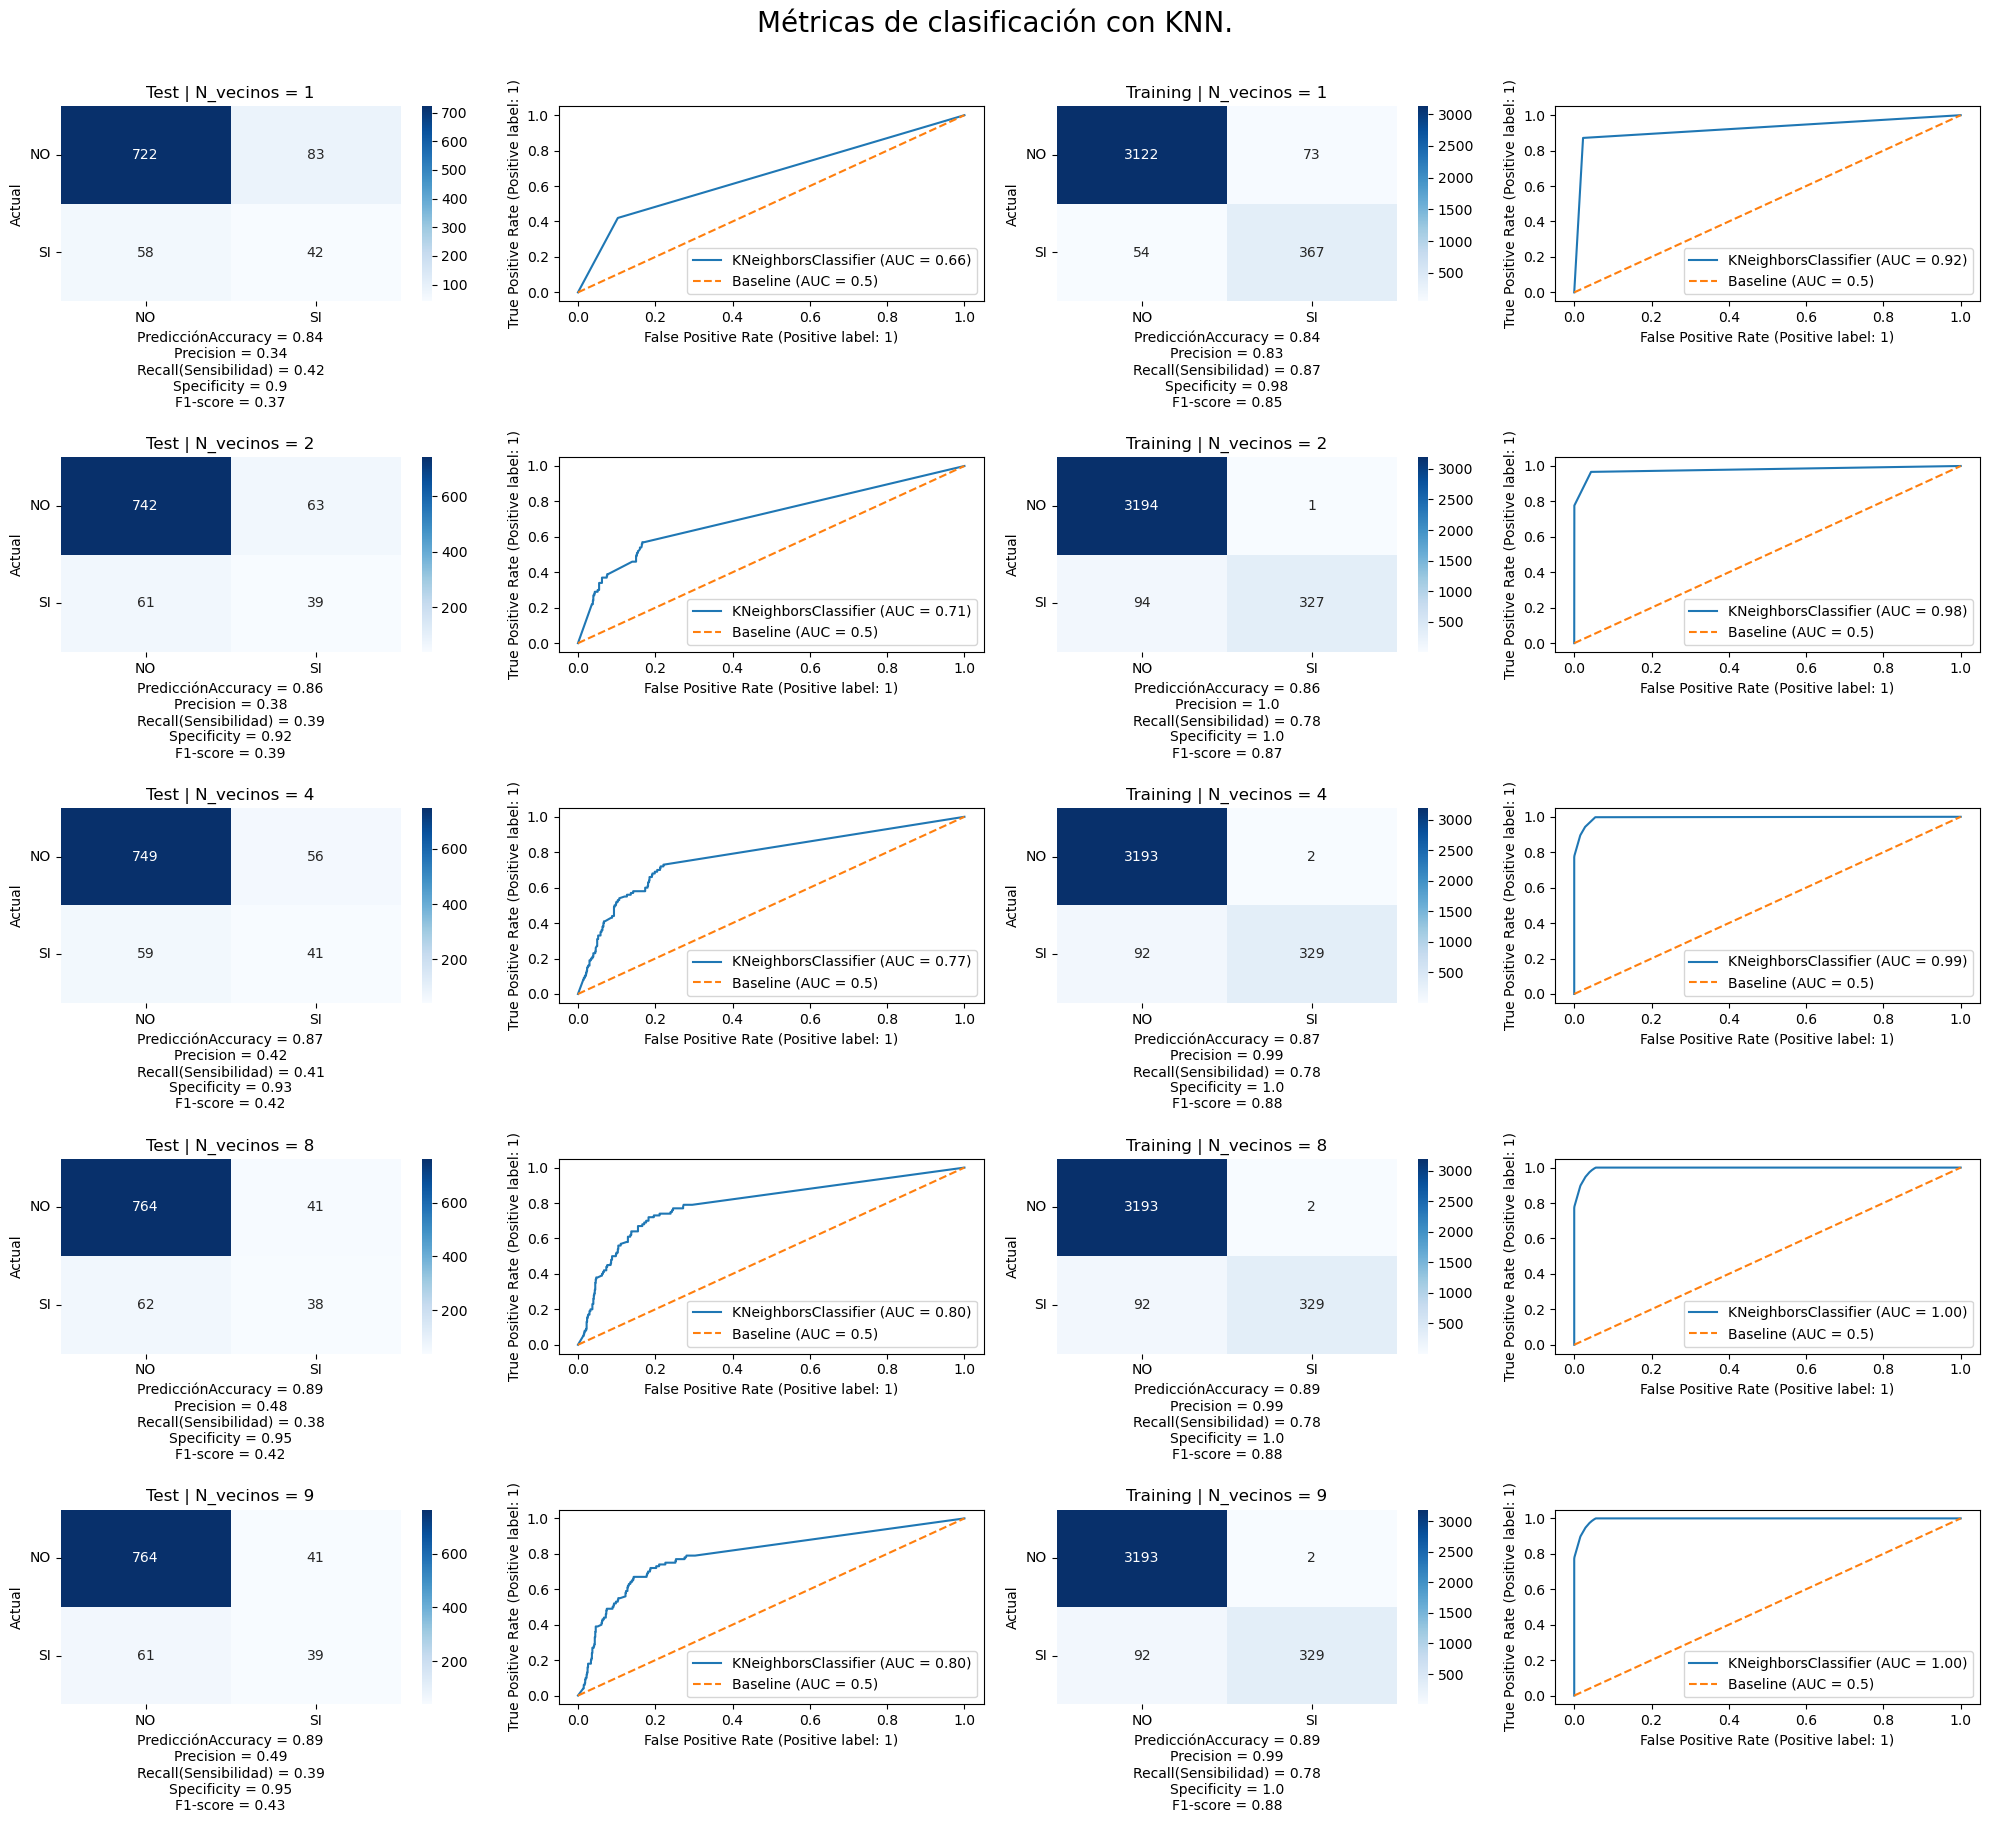

In [12]:
def knnClfMetrics(n,row,axes):
    # Luego de realizar varias pruebas se identificó que para este conjunto
    # de datos, se obtienen mejores resultados utilizando el inverso de la
    # distancia (weights='distance')  
    knnClf = KNeighborsClassifier(n_neighbors = n,weights='distance')
    knnClf.fit(X_train, y_train)

    resultsTest = pd.DataFrame(y_test, columns=['expected'])
    resultsTrain = pd.DataFrame(y_train, columns=['expected'])

    resultsTest['predicted_l1_c1'] = knnClf.predict(X_test)
    resultsTrain['predicted_l1_c1'] = knnClf.predict(X_train)

    confTest = confusion_matrix(resultsTest['expected'], resultsTest['predicted_l1_c1'])
    confTraining = confusion_matrix(resultsTrain['expected'], resultsTrain['predicted_l1_c1'])

    hmap = sns.heatmap(ax=axes[row, 0],data=confTest,cmap='Blues',annot=True,fmt='g')
    hmap.set_xticklabels(['NO','SI'],rotation = 0)
    hmap.set_yticklabels(['NO','SI'],rotation = 0)
    hmap.set_title('Test | N_vecinos = ' +str(n))
    hmap.set_ylabel('Actual')

    tn, fp, fn, tp = confusion_matrix(resultsTest['expected'],resultsTest['predicted_l1_c1']).ravel()
    acurracy = (tp + tn) / (tp + tn  + fp + fn)
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    recall = tp / (tp+fn)
    f1 = 2*(precision*recall)/(precision + recall)
    #aucScore = roc_auc_score(y_test, logReg.predict_proba(X_test)[:,1])

    metricsText = 'Predicción'
    metricsText += 'Accuracy = ' + str(round(acurracy,2))
    metricsText += '\nPrecision = ' + str(round(precision,2))
    metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
    metricsText += '\nSpecificity = ' + str(round(specificity,2))
    metricsText += '\nF1-score = ' + str(round(f1,2))
    #metricsText += '\nAUC = ' + str(round(aucScore,2))
    hmap.set_xlabel(metricsText)

    RocCurveDisplay.from_estimator(knnClf, X_test, y_test,ax=axes[row,1])
    axes[row,1].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
    axes[row,1].legend()

    hmap = sns.heatmap(ax=axes[row, 2],data=confTraining,cmap='Blues',annot=True,fmt='g')
    hmap.set_xticklabels(['NO','SI'],rotation = 0)
    hmap.set_yticklabels(['NO','SI'],rotation = 0)
    hmap.set_title('Training | N_vecinos = ' +str(n))
    hmap.set_ylabel('Actual')

    tn, fp, fn, tp = confusion_matrix(resultsTrain['expected'],resultsTrain['predicted_l1_c1']).ravel()
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    recall = tp / (tp+fn)
    f1 = 2*(precision*recall)/(precision + recall)
    #aucScore = roc_auc_score(y_train, logReg.predict_proba(X_train)[:,1])

    metricsText = 'Predicción'
    metricsText += 'Accuracy = ' + str(round(acurracy,2))
    metricsText += '\nPrecision = ' + str(round(precision,2))
    metricsText += '\nRecall(Sensibilidad) = ' + str(round(recall,2))
    metricsText += '\nSpecificity = ' + str(round(specificity,2))
    metricsText += '\nF1-score = ' + str(round(f1,2))
    #metricsText += '\nAUC = ' + str(round(aucScore,2))
    hmap.set_xlabel(metricsText)

    RocCurveDisplay.from_estimator(knnClf, X_train, y_train,ax=axes[row,3])
    axes[row,3].plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
    axes[row,3].legend()

plt.style.use('default')
fig,axes = plt.subplots(5,4,figsize=(20,18))

knnClfMetrics(n=1, row=0, axes=axes)
knnClfMetrics(n=2, row=1, axes=axes)
knnClfMetrics(n=4, row=2, axes=axes)
knnClfMetrics(n=8, row=3, axes=axes)
knnClfMetrics(n=9, row=4, axes=axes)

# Se probaron con n > 9,sin embargo, a partir de este umbral las métricas comienzan a ser inferiores
#knnClfMetrics(n=10, row=4, axes=axes)
#knnClfMetrics(n=11, row=4, axes=axes)
#knnClfMetrics(n=16, row=4, axes=axes)
#knnClfMetrics(n=32, row=4, axes=axes)

fig.suptitle("Métricas de clasificación con KNN.",y=1.01, fontsize=20)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8)



    


## Respuesta a preguntas
1. **¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué?** Sugerencia: piensa en lo que significa cada métrica en este escenario específico. **¿Qué métrica va a ayudar más al banco?**

    En este caso, deberían enfocarse los esfuerzos por tratar de aumentar la sensibilidad(recall) del modelo, intentando no reducir drásticamente la especificidad. El aumento de sensibilidad, o tasa de verdaderos positivos, permitirá que se identifiquen correctamente a la mayoría de casos verdaderos. De este modo podrían enforcarse en las personas que realmente cumplen con las condiciones necesarias para suscribirse a un depósito a plazo.

2. Compara la precisión de tu modelo con el modelo de referencia. **¿Ves algún problema aquí?**

    Debido al desbalance entres las clases "SI" y "NO", la métrica "Accuracy", por si sola, no es la adecuada para evaluar este modelo. Si se revisan los valores de precición, sensibilidad, especificidad y F1-Score  del modelo se puede observar:
        
    * Accuracy (alto)
    * Precision (Bajo)
    * Recall(Bajo)
    * Specificity(Alto)
    * F1-Score (Bajo)
3. **¿De qué otras formas podrías mejorar este modelo?**

 * Determinar la significancia que tiene cada una de las variable en el modelo e incluir únicamente aquellas que aporten al modelo.
    * Por ejemplo, en este ejercicio se tomaron únicamente los seis parámetros con mayor correlación absoluta y se obtuvieron mejores resultados que al usar todas las variables.
 * Efectuar pruebas iterativas para encontrar los hiperparámetros con los cuales se obtengan métricas favorables para la solución del problema.
